In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

# データを読み込む
digits = load_digits()
print('digits', digits, '\n')
print('target_names', digits.target_names)
# data         学習用画像データ
# target       画像データに対応する番号
# target_names 何の数字か
# images       画像データ 8x8の行列
# DESCR        説明

df = pd.DataFrame(digits.data)
df

digits {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


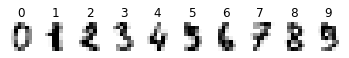

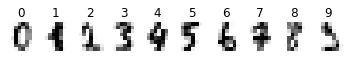

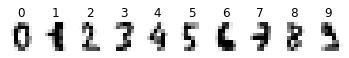

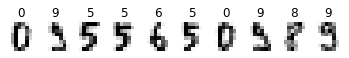

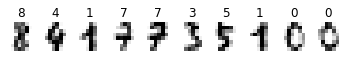

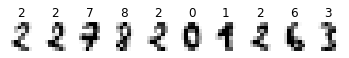

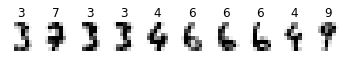

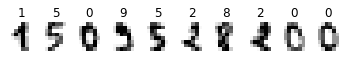

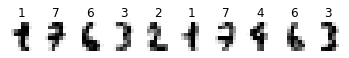

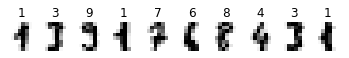

In [33]:
# 画像データ描画
%matplotlib inline
import matplotlib.pyplot as plt

# for i in range(10):
#     plt.subplot(1, 10, i+1)
#     plt.axis('off')
#     plt.title(digits.target[i])
#     plt.imshow(digits.images[i], cmap='Greys')

# plt.show()

for offset in range(10):
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.axis('off')
        plt.title(digits.target[i+offset*10])
        img = np.reshape(digits.data[i+offset*10], (8,8))
        plt.imshow(img, cmap='Greys')

    plt.show()


In [34]:
# 訓練用データとテスト用データに分割
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('n train = ', len(X_train))
print('n test = ', len(X_test))

n train =  1347
n test =  450


In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# ガウスカーネル法SVMの学習モデル
model = svm.SVC(kernel='rbf', gamma=0.001)
model.fit(X_train, y_train)

# 正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score * 100) + '%')

accuracy 99.55555555555556%


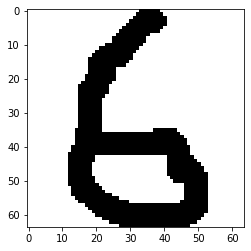

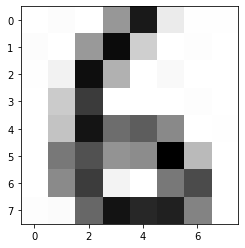

In [38]:
## 画像を読み込んで予測する
from PIL import Image

# 画像ファイル読込
filename = './sample_img.png'
image = Image.open(filename).convert('L')

plt.imshow(image, cmap='gray')
plt.show()

# 8x8マスの画像に変換
image = image.resize((8, 8), Image.Resampling.LANCZOS)
plt.imshow(image, cmap='gray')
plt.show()

In [39]:
img = np.asarray(image, dtype=float)
print(img)

# グレースケールを256段階から16段階に変換
img = 16 - np.floor(17*img/256)
print(img)

# 2次元配列から1次元配列に変換
img = img.flatten()
print(img)

# 予測
pred = model.predict([img])
print('予測結果 ', pred)

[[255. 252. 255. 152.  28. 235. 254. 254.]
 [252. 255. 154.  14. 207. 255. 253. 255.]
 [254. 242.  17. 178. 255. 249. 255. 255.]
 [255. 203.  62. 255. 255. 255. 253. 255.]
 [255. 195.  23. 111.  95. 138. 255. 254.]
 [255. 122.  83. 149. 141.   3. 187. 255.]
 [255. 139.  64. 244. 255. 122.  77. 255.]
 [253. 251. 105.  22.  42.  36. 133. 255.]]
[[ 0.  0.  0.  6. 15.  1.  0.  0.]
 [ 0.  0.  6. 16.  3.  0.  0.  0.]
 [ 0.  0. 15.  5.  0.  0.  0.  0.]
 [ 0.  3. 12.  0.  0.  0.  0.  0.]
 [ 0.  4. 15.  9. 10.  7.  0.  0.]
 [ 0.  8. 11.  7.  7. 16.  4.  0.]
 [ 0.  7. 12.  0.  0.  8. 11.  0.]
 [ 0.  0. 10. 15. 14. 14.  8.  0.]]
[ 0.  0.  0.  6. 15.  1.  0.  0.  0.  0.  6. 16.  3.  0.  0.  0.  0.  0.
 15.  5.  0.  0.  0.  0.  0.  3. 12.  0.  0.  0.  0.  0.  0.  4. 15.  9.
 10.  7.  0.  0.  0.  8. 11.  7.  7. 16.  4.  0.  0.  7. 12.  0.  0.  8.
 11.  0.  0.  0. 10. 15. 14. 14.  8.  0.]
予測結果  [6]


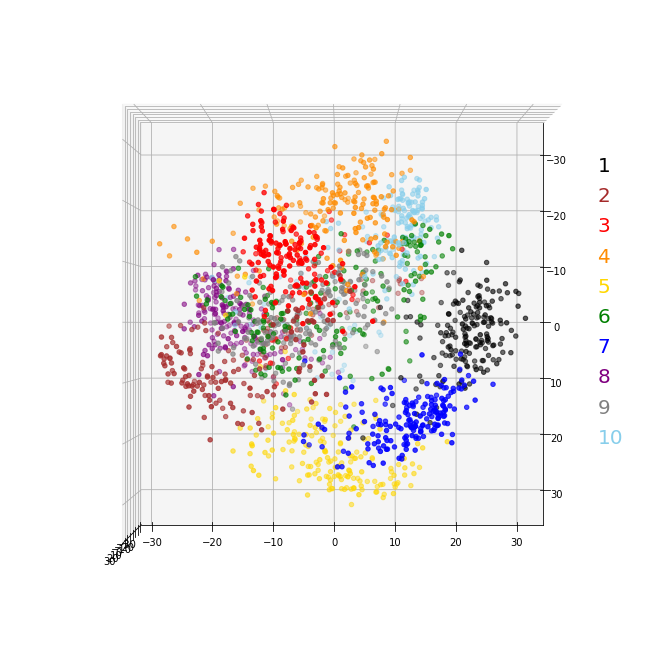

In [40]:
## 画像データを3Dで描画
from sklearn.datasets import load_digits
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target

# 色名一覧
color_names = [
    'BLACK', 'BROWN', 'RED','DARKORANGE', 'GOLD', 
    'GREEN', 'BLUE', 'PURPLE', 'GRAY', 'SKYBLUE',
]

# yの値を色名に変換
colors = [color_names[i] for i in y]

# 主成分分析で特徴量を64次元から3次元に減らす
pca = decomposition.PCA(n_components=3)
features3 = pca.fit_transform(X)

# df
df = pd.DataFrame(features3)

# 3D散布図
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df[0], df[1], df[2], color=colors)

# 視点変更
ax.view_init(90, 0)

# 数字と色の凡例表示
for i, col in enumerate(color_names):
    n = i + 1
    ax.text(-30+n*5, 40, 30, str(n), size=20, color=col)

plt.show()